# Train CNN with MFCCs


## cnn_mfccs_3


Inspired by https://medium.com/@diego-rios/speech-emotion-recognition-with-convolutional-neural-network-ae5406a1c0f7


Import the necessary libraries


In [1]:
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
import os
import sys
import numpy as np
import random

In [2]:
# Get the absolute path to the project root without relying on __file__
notebook_path = os.getcwd()  # Gets current working directory
project_root = os.path.abspath(os.path.join(notebook_path, "../../.."))
sys.path.insert(0, project_root)

In [3]:
print(torch.__version__)
print(torch.cuda.is_available())

2.1.1+cu118
True


Set the seed for reproducibility


In [4]:
random_seed = 42

torch.manual_seed(random_seed)
np.random.seed(random_seed)
random.seed(random_seed)

if (torch.cuda.is_available()):
    torch.cuda.manual_seed(random_seed)

Set some constant strings


In [5]:
model_name = 'cnn_mfccs_zero_3'

train_csv = '../../../data/mfcc_train_dataset.csv'
test_csv = '../../../data/mfcc_test_dataset.csv'
val_csv = '../../../data/mfcc_val_dataset.csv'
root_dir = '../../../data/'
class_weights_path = '../../../data/class_weights.pt'

Import other helper classes


In [6]:
from cnn.datasets.MfccDataset import MFCCDataset
from cnn.pipeline.Pipeline import Pipeline

Import the model


In [7]:
from cnn.models.architectures.CNNMFCCs3 import CNNMFCCs3

model = CNNMFCCs3()

# Move model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

CNNMFCCs3(
  (conv1): Conv1d(40, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (bn1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
  (bn3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv1d(128, 256, kernel_size=(3,), stride=(1,), padding=(1,))
  (bn4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (global_pool): AdaptiveAvgPool1d(output_size=1)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=9, bias=True)
)

Visualize the model


In [8]:
summary(model, (40, 172))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1              [-1, 32, 172]           3,872
       BatchNorm1d-2              [-1, 32, 172]              64
            Conv1d-3               [-1, 64, 86]           6,208
       BatchNorm1d-4               [-1, 64, 86]             128
            Conv1d-5              [-1, 128, 43]          24,704
       BatchNorm1d-6              [-1, 128, 43]             256
            Conv1d-7              [-1, 256, 21]          98,560
       BatchNorm1d-8              [-1, 256, 21]             512
 AdaptiveAvgPool1d-9               [-1, 256, 1]               0
          Dropout-10                  [-1, 256]               0
           Linear-11                  [-1, 128]          32,896
          Dropout-12                  [-1, 128]               0
           Linear-13                    [-1, 9]           1,161
Total params: 168,361
Trainable params:

Define the learning rate, criterion, optimizer, transformations, and number of epochs


In [9]:
learning_rate = 0.001

class_weights = torch.load(class_weights_path).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Define transformations
transform = transforms.Compose([])

num_epochs = 100

Prepare datasets and dataloaders


In [10]:
trainset = MFCCDataset(
    csv_file=train_csv, root_dir=root_dir, transform=transform)
valset = MFCCDataset(
    csv_file=val_csv, root_dir=root_dir, transform=transform)
testset = MFCCDataset(
    csv_file=test_csv, root_dir=root_dir, transform=transform)

trainloader = DataLoader(trainset, batch_size=128,
                         shuffle=True, num_workers=8, pin_memory=True)
valloader = DataLoader(valset, batch_size=128,
                       shuffle=False, num_workers=8, pin_memory=True)
testloader = DataLoader(testset, batch_size=128,
                        shuffle=False, num_workers=8, pin_memory=True)

Execute the pipeline


Mapping from Emotion to Number: {'Anger': 0, 'Bored': 1, 'Disgust': 2, 'Fear': 3, 'Happy': 4, 'Neutral': 5, 'Question': 6, 'Sad': 7, 'Surprise': 8}
Model is on: cuda:0
Epoch 1/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 70.93it/s, Loss=0.9619556069374084, Elapsed=1.2162s, ETA=0.0000s]

Epoch 1 completed in 9.5072s
Train Loss: 1.2965190510529314 - Train Accuracy: 42.2717713303634
Validation Loss: 1.0838600858052572 - Validation Accuracy: 50.970873786407765

Epoch 2/100



Validating: 100%|██████████| 75/75 [00:01<00:00, 69.00it/s, Loss=0.8723607659339905, Elapsed=1.2619s, ETA=0.0000s]

Epoch 2 completed in 6.0852s
Train Loss: 0.9949185200509308 - Train Accuracy: 55.59349630266163
Validation Loss: 0.8928949530919393 - Validation Accuracy: 62.230899113550024

Epoch 3/100



Validating: 100%|██████████| 75/75 [00:01<00:00, 71.93it/s, Loss=1.5913176536560059, Elapsed=1.2104s, ETA=0.0000s]

Epoch 3 completed in 6.4836s
Train Loss: 0.8875747727865428 - Train Accuracy: 60.6499174600303
Validation Loss: 0.8991327174504598 - Validation Accuracy: 60.71127057830308

EarlyStopping counter: 1/7
Epoch 4/100



Validating: 100%|██████████| 75/75 [00:01<00:00, 67.06it/s, Loss=0.6818971633911133, Elapsed=1.2850s, ETA=0.0000s]


Epoch 4 completed in 6.2797s
Train Loss: 0.8189429509846461 - Train Accuracy: 63.824879582099
Validation Loss: 0.8098767995834351 - Validation Accuracy: 66.35711270578302

Epoch 5/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 67.67it/s, Loss=0.8039146065711975, Elapsed=1.2699s, ETA=0.0000s]

Epoch 5 completed in 6.3739s
Train Loss: 0.7821845841201055 - Train Accuracy: 65.62266796318491
Validation Loss: 0.7767802516619364 - Validation Accuracy: 69.00590966652595

Epoch 6/100



Validating: 100%|██████████| 75/75 [00:01<00:00, 64.02it/s, Loss=0.4646364748477936, Elapsed=1.3663s, ETA=0.0000s]

Epoch 6 completed in 6.0615s
Train Loss: 0.7419468760490417 - Train Accuracy: 67.3073878926302
Validation Loss: 0.8114644436041514 - Validation Accuracy: 65.47066272688899

EarlyStopping counter: 1/7
Epoch 7/100



Validating: 100%|██████████| 75/75 [00:01<00:00, 69.92it/s, Loss=0.3316706717014313, Elapsed=1.2349s, ETA=0.0000s]

Epoch 7 completed in 6.2729s
Train Loss: 0.7102247149269015 - Train Accuracy: 68.86320978720516
Validation Loss: 0.748589098850886 - Validation Accuracy: 66.4731954411144

Epoch 8/100



Validating: 100%|██████████| 75/75 [00:01<00:00, 63.41it/s, Loss=0.3299209177494049, Elapsed=1.3788s, ETA=0.0000s] 

Epoch 8 completed in 6.2873s
Train Loss: 0.689231985566244 - Train Accuracy: 69.72931412677235
Validation Loss: 0.6934702114264171 - Validation Accuracy: 71.15871675812579

Epoch 9/100



Validating: 100%|██████████| 75/75 [00:01<00:00, 66.76it/s, Loss=0.3592433035373688, Elapsed=1.2682s, ETA=0.0000s]

Epoch 9 completed in 6.7494s
Train Loss: 0.6601780682285397 - Train Accuracy: 70.88487370253952
Validation Loss: 0.7462669559319814 - Validation Accuracy: 70.1772899957788

EarlyStopping counter: 1/7
Epoch 10/100



Validating: 100%|██████████| 75/75 [00:01<00:00, 69.81it/s, Loss=0.37696391344070435, Elapsed=1.2387s, ETA=0.0000s]

Epoch 10 completed in 6.1853s
Train Loss: 0.6395605657831093 - Train Accuracy: 71.88666018407544
Validation Loss: 0.713321852684021 - Validation Accuracy: 69.30139299282398

EarlyStopping counter: 2/7
Epoch 11/100



Validating: 100%|██████████| 75/75 [00:01<00:00, 70.47it/s, Loss=0.2611001133918762, Elapsed=1.2287s, ETA=0.0000s] 


Epoch 11 completed in 6.1789s
Train Loss: 0.6214550923922159 - Train Accuracy: 72.73015083331448
Validation Loss: 0.6828775807221731 - Validation Accuracy: 72.06627268889827

Epoch 12/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 71.39it/s, Loss=0.2951555848121643, Elapsed=1.2456s, ETA=0.0000s] 

Epoch 12 completed in 5.9212s
Train Loss: 0.6059192876423025 - Train Accuracy: 73.3135840437801
Validation Loss: 0.6940579390525818 - Validation Accuracy: 71.17982271000423

EarlyStopping counter: 1/7
Epoch 13/100



Validating: 100%|██████████| 75/75 [00:01<00:00, 67.92it/s, Loss=0.38991519808769226, Elapsed=1.3079s, ETA=0.0000s]


Epoch 13 completed in 6.2173s
Train Loss: 0.5882883574059933 - Train Accuracy: 73.86083534972072
Validation Loss: 0.6672681407133738 - Validation Accuracy: 72.77332207682566

Epoch 14/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 68.43it/s, Loss=0.55109703540802, Elapsed=1.2937s, ETA=0.0000s]   

Epoch 14 completed in 6.0286s
Train Loss: 0.5749587508812116 - Train Accuracy: 74.40582528662853
Validation Loss: 0.6660293757915496 - Validation Accuracy: 72.63613338961588

Epoch 15/100



Validating: 100%|██████████| 75/75 [00:01<00:00, 72.16it/s, Loss=0.4026844799518585, Elapsed=1.2018s, ETA=0.0000s] 

Epoch 15 completed in 6.2661s
Train Loss: 0.5510482997391265 - Train Accuracy: 75.400827661066
Validation Loss: 0.7299015974998474 - Validation Accuracy: 70.89489235964543

EarlyStopping counter: 1/7
Epoch 16/100



Validating: 100%|██████████| 75/75 [00:01<00:00, 67.88it/s, Loss=0.09277347475290298, Elapsed=1.3003s, ETA=0.0000s]

Epoch 16 completed in 6.2204s
Train Loss: 0.5432073616912599 - Train Accuracy: 75.88249926505506
Validation Loss: 0.6486953140298526 - Validation Accuracy: 72.30899113550021

Epoch 17/100



Validating: 100%|██████████| 75/75 [00:01<00:00, 65.86it/s, Loss=0.10360980778932571, Elapsed=1.3222s, ETA=0.0000s]

Epoch 17 completed in 6.5883s
Train Loss: 0.5233021931496659 - Train Accuracy: 76.3800004522738
Validation Loss: 0.7056897653142611 - Validation Accuracy: 71.81300126635712

EarlyStopping counter: 1/7
Epoch 18/100



Validating: 100%|██████████| 75/75 [00:01<00:00, 73.44it/s, Loss=0.15475988388061523, Elapsed=1.1769s, ETA=0.0000s]


Epoch 18 completed in 6.0869s
Train Loss: 0.5096796844046929 - Train Accuracy: 76.89106985368942
Validation Loss: 0.6515331955750784 - Validation Accuracy: 73.50147741663149

EarlyStopping counter: 2/7
Epoch 19/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 67.27it/s, Loss=0.45921188592910767, Elapsed=1.2830s, ETA=0.0000s]


Epoch 19 completed in 6.1519s
Train Loss: 0.49748565670038236 - Train Accuracy: 77.54686687320503
Validation Loss: 0.6831472412745158 - Validation Accuracy: 71.96074292950611

EarlyStopping counter: 3/7
Epoch 20/100


Validating: 100%|██████████| 75/75 [00:01<00:00, 68.10it/s, Loss=0.17215968668460846, Elapsed=1.2657s, ETA=0.0000s]

Epoch 20 completed in 5.9546s
Train Loss: 0.4802880498198415 - Train Accuracy: 78.14612966690035
Validation Loss: 0.6761074175437292 - Validation Accuracy: 73.7864077669903

EarlyStopping counter: 4/7
Epoch 21/100



Validating: 100%|██████████| 75/75 [00:01<00:00, 63.59it/s, Loss=0.4795757830142975, Elapsed=1.3760s, ETA=0.0000s] 

Epoch 21 completed in 6.3881s
Train Loss: 0.46699896799346613 - Train Accuracy: 78.59614210443002
Validation Loss: 0.7033046396573385 - Validation Accuracy: 72.19290840016885

EarlyStopping counter: 5/7
Epoch 22/100



Validating: 100%|██████████| 75/75 [00:01<00:00, 66.91it/s, Loss=0.20198146998882294, Elapsed=1.3024s, ETA=0.0000s]

Epoch 22 completed in 6.0770s
Train Loss: 0.4540648657634768 - Train Accuracy: 78.86976775740034
Validation Loss: 0.7300000796715419 - Validation Accuracy: 74.17686787674124

EarlyStopping counter: 6/7
Epoch 23/100



Validating: 100%|██████████| 75/75 [00:01<00:00, 70.62it/s, Loss=0.22600722312927246, Elapsed=1.2228s, ETA=0.0000s]


Epoch 23 completed in 6.2154s
Train Loss: 0.44317666497189184 - Train Accuracy: 79.42380317043938
Validation Loss: 0.7070978550116221 - Validation Accuracy: 73.81806669480794

EarlyStopping counter: 7/7
🔁 Early stopping triggered!


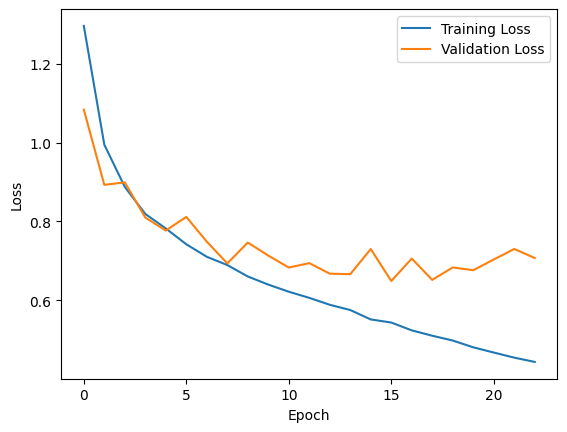

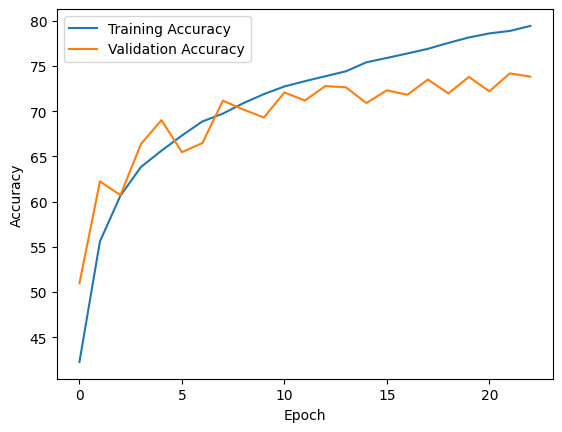

Evaluating best model on test set...


Testing: 100%|██████████| 75/75 [00:01<00:00, 57.96it/s]


Test Accuracy: 0.7334
Test Precision: 0.7475
Test Recall: 0.7334
Test F1-score: 0.7325

              precision    recall  f1-score   support

       Anger       0.79      0.77      0.78       916
       Bored       0.81      0.84      0.82      1098
     Disgust       0.65      0.60      0.62       291
        Fear       0.46      0.72      0.56       308
       Happy       0.85      0.58      0.69      1914
     Neutral       0.70      0.68      0.69      2226
    Question       0.82      0.89      0.86      1139
         Sad       0.66      0.83      0.73       857
    Surprise       0.65      0.81      0.73       728

    accuracy                           0.73      9477
   macro avg       0.71      0.75      0.72      9477
weighted avg       0.75      0.73      0.73      9477



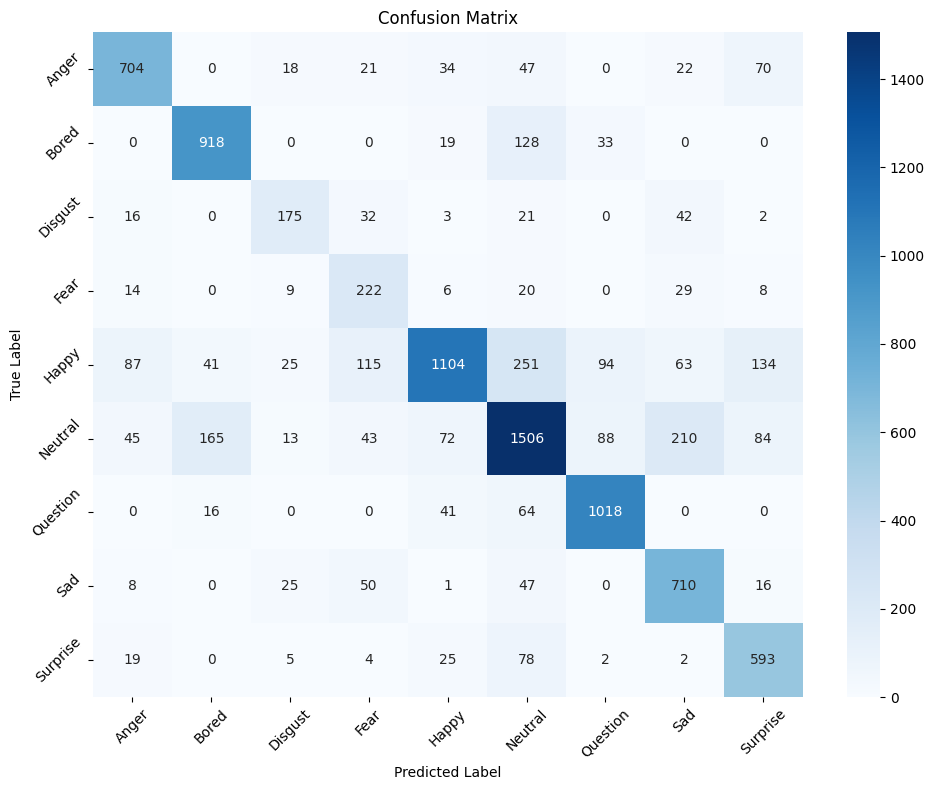

In [11]:
Pipeline.execute(
    model=model,
    labelmap=trainset.label_map,
    trainloader=trainloader,
    valloader=valloader,
    testloader=testloader,
    criterion=criterion,
    optimizer=optimizer,
    device=device,
    num_epochs=num_epochs,
    model_name=model_name,
    patience=7
)